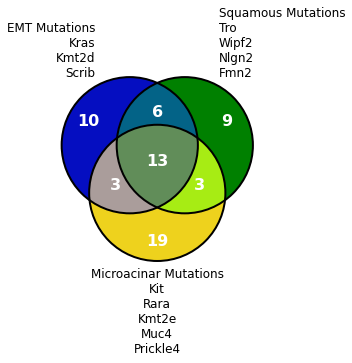

In [36]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.read_excel('EMT_Squamous_Microacinar_SNV_Comparison.xlsx')
EMTlist = df['EMT_Gene'].tolist()
Squamouslist = df['Squamous_Gene'].tolist()
Microacinarlist = df['Microacinar_Gene'].tolist()
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt
%matplotlib inline
dfA = pd.DataFrame(EMTlist,columns=['A'])
dfB = pd.DataFrame(Squamouslist,columns=['B'])
dfC = pd.DataFrame(Microacinarlist,columns=['C'])
A = set(dfA.A)
B = set(dfB.B)
C = set(dfC.C)
AB_overlap = A & B  #compute intersection of set A & set B
AC_overlap = A & C
BC_overlap = B & C
ABC_overlap = A & B & C
A_rest = A - AB_overlap - AC_overlap #see left graphic
B_rest = B - AB_overlap - BC_overlap
C_rest = C - AC_overlap - BC_overlap
AB_only = AB_overlap - ABC_overlap   #see right graphic
AC_only = AC_overlap - ABC_overlap
BC_only = BC_overlap - ABC_overlap
from collections import Counter
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
sets = Counter()               #set order A, B, C   
sets['100'] = len(A_rest)      #100 denotes A on, B off, C off 
sets['010'] = len(B_rest)      #010 denotes A off, B on, C off
sets['001'] = len(C_rest)      #001 denotes A off, B off, C on 
sets['110'] = len(AB_only)     #110 denotes A on, B on, C off
sets['101'] = len(AC_only)     #101 denotes A on, B off, C on 
sets['011'] = len(BC_only)     #011 denotes A off, B on, C on 
sets['111'] = len(ABC_overlap) #011 denotes A on, B on, C on
labels = ('EMT Mutations\nKras\nKmt2d\nScrib', 'Squamous Mutations\nTro\nWipf2\nNlgn2\nFmn2', 'Microacinar Mutations\nKit\nRara\nKmt2e\nMuc4\nPrickle4')  
plt.figure(figsize=(4,4)) 
ax = plt.gca() 
v = venn3_unweighted(subsets=sets, set_labels=labels, ax=ax,set_colors=    
      ('#050EC1','g','#EED21D'),alpha=1)    
venn3_circles(subsets = (1,1,1,1,1,1,1))
for text in v.subset_labels:
  text.set_color('white')
  text.set_fontsize(16)
  text.set_fontweight('bold')
fig = plt.gca().figure
fig.savefig("MYC_SNVs_Venn_Diagram.svg", dpi=1200)
plt.show()